In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scipy
#!pip install plotly
#!pip install scikit-learn
#!pip install scikit-learn==0.24.2
#!pip install hnswlib
#!pip install annoy
#!pip install seaborn
#!pip install scalecast

In [2]:
#conda list

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
from matplotlib import dates as mpl_dates
from matplotlib import pyplot as plt

/home/sean/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
from scalecast.Forecaster import Forecaster
from scalecast.AnomalyDetector import AnomalyDetector
from scalecast.SeriesTransformer import SeriesTransformer

In [5]:
df = pd.read_csv("3D_Printing_data.csv")

In [6]:
df.describe()

,Temp,RelativeHumidity
count,1.007983e+06,1.075381e+06
mean,2.020231e+01,3.023567e+01
std,3.251303e+00,3.392731e+00
min,1.087500e+01,1.861243e+01
25%,1.856250e+01,2.808051e+01
50%,2.037500e+01,3.010992e+01
75%,2.218750e+01,3.225378e+01
max,3.293750e+01,4.845099e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075381 entries, 0 to 1075380
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1075381 non-null  object 
 1   ts                1075381 non-null  object 
 2   Temp              1007983 non-null  float64
 3   RelativeHumidity  1075381 non-null  float64
dtypes: float64(2), object(2)
memory usage: 32.8+ MB


In [8]:
df.isna().sum()

ID                      0
ts                      0
Temp                67398
RelativeHumidity        0
dtype: int64

In [9]:
df.rename(columns={'ts': 'time'}, inplace=True)
df.rename(columns={'Temp': 'Temperature'}, inplace=True)

In [10]:
df = df.sort_values(by='time', ascending=True)

df = df.head(600000)

df = df.reset_index(drop=True)

In [11]:
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].dt.tz_localize(None)
df = df.drop(columns=['ID'],axis=1)

In [12]:
df.head(20)

,time,Temperature,RelativeHumidity
0,2024-02-16 17:44:30,21.1250,48.450989
1,2024-02-16 17:44:35,21.2500,46.909851
2,2024-02-16 17:44:40,21.2500,45.925659
3,2024-02-16 17:44:45,21.2500,45.559448
4,2024-02-16 17:44:50,21.2500,45.177979
5,2024-02-16 17:44:55,21.1875,44.697327
6,2024-02-16 17:45:00,21.1875,44.270081
7,2024-02-16 17:45:05,21.1875,44.003052
8,2024-02-16 17:45:10,21.1875,43.728394
9,2024-02-16 17:45:15,21.1875,43.537659


In [13]:
df['Temperature'] = round(df['Temperature'], 2)
df['RelativeHumidity'] = round(df['RelativeHumidity'], 2)

In [14]:
filled_df = df
new_df1 = filled_df

In [15]:
new_df = new_df1
new_df

,time,Temperature,RelativeHumidity
0,2024-02-16 17:44:30,21.12,48.45
1,2024-02-16 17:44:35,21.25,46.91
2,2024-02-16 17:44:40,21.25,45.93
3,2024-02-16 17:44:45,21.25,45.56
4,2024-02-16 17:44:50,21.25,45.18
...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62
599996,2024-03-22 11:25:49,24.56,23.61
599997,2024-03-22 11:25:54,24.56,23.61
599998,2024-03-22 11:25:59,24.56,23.63


# Missing Data Imputation

In [17]:
new_df['Temperature'].interpolate(method='linear', inplace=True)
#new_df['Temperature'].interpolate(method='spline', order = 3, inplace=True)

print(new_df)

new_df.isna().sum()

                      time  Temperature  RelativeHumidity
0      2024-02-16 17:44:30        21.12             48.45
1      2024-02-16 17:44:35        21.25             46.91
2      2024-02-16 17:44:40        21.25             45.93
3      2024-02-16 17:44:45        21.25             45.56
4      2024-02-16 17:44:50        21.25             45.18
...                    ...          ...               ...
599995 2024-03-22 11:25:44        24.62             23.62
599996 2024-03-22 11:25:49        24.56             23.61
599997 2024-03-22 11:25:54        24.56             23.61
599998 2024-03-22 11:25:59        24.56             23.63
599999 2024-03-22 11:26:04        24.56             23.63

[600000 rows x 3 columns]


time                0
Temperature         0
RelativeHumidity    0
dtype: int64

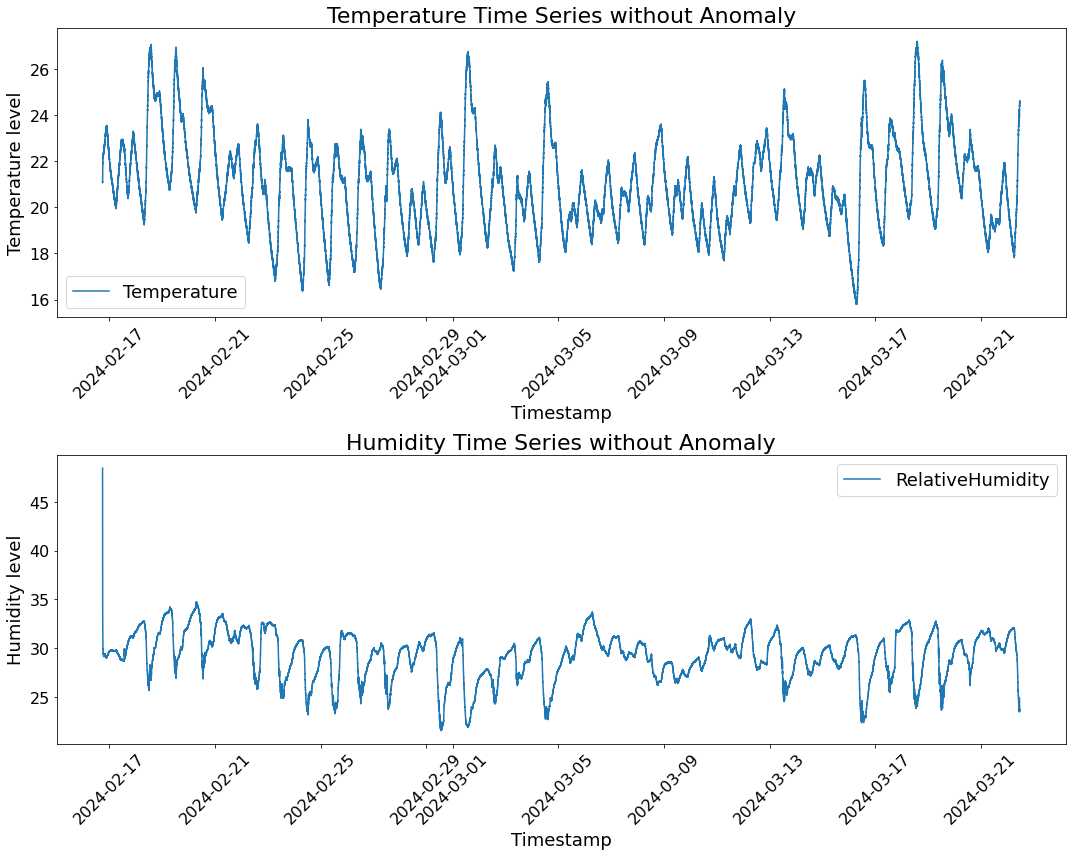

In [153]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Define font sizes for title, labels, and ticks
title_fontsize = 22
label_fontsize = 18
tick_fontsize = 16

# Plot Temperature on the first subplot
axs[0].plot(new_df['time'], new_df['Temperature'], label='Temperature')
axs[0].set_xlabel('Timestamp', fontsize=label_fontsize)
axs[0].set_ylabel('Temperature level', fontsize=label_fontsize)
axs[0].set_title('Temperature Time Series without Anomaly', fontsize=title_fontsize)
axs[0].legend(fontsize=label_fontsize)
axs[0].tick_params(axis='x', labelsize=tick_fontsize, rotation=45)  # Rotate x-axis labels for better readability
axs[0].tick_params(axis='y', labelsize=tick_fontsize)

# Plot RelativeHumidity on the second subplot
axs[1].plot(new_df['time'], new_df['RelativeHumidity'], label='RelativeHumidity')
axs[1].set_xlabel('Timestamp', fontsize=label_fontsize)
axs[1].set_ylabel('Humidity level', fontsize=label_fontsize)
axs[1].set_title('Humidity Time Series without Anomaly', fontsize=title_fontsize)
axs[1].legend(fontsize=label_fontsize)
axs[1].tick_params(axis='x', labelsize=tick_fontsize, rotation=45)  # Rotate x-axis labels for better readability
axs[1].tick_params(axis='y', labelsize=tick_fontsize)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [154]:
correlation = new_df['Temperature'].corr(new_df['RelativeHumidity'])

print("Correlation between Temperature and RelativeHumidity:", correlation)

Correlation between Temperature and RelativeHumidity: -0.5193350918167688


# INJECT ARTIFICIAL OUTLIERS TO TEMPERATURE DATA

# The outliers are constant values of varying itensities (e.g large variations, subtle variations and extreme variations)

In [155]:
new_df['Temp_anomaly'] = new_df['Temperature']

new_df['anomaly_time'] = pd.to_datetime(new_df['time'])


# Select the dates for inputing outliers
specific_dates1 = ['2024-03-13', '2024-03-03', '2024-02-19']
specific_dates2 = ['2024-02-21', '2024-02-25', '2024-03-07']
specific_dates3 = ['2024-02-23', '2024-02-26', '2024-03-09']
specific_dates4 = ['2024-02-29', '2024-03-05']


# Create the condition mask
mask1 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates1)) & (new_df['Temperature'].between(22.3, 22.45))
mask2 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates2)) & (new_df['Temperature'].between(20.4, 20.5))
mask3 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates3)) & (new_df['Temperature'].between(21.3, 21.4))
mask4 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates4)) & (new_df['Temperature'].between(21.5, 21.7))


# Apply the replacement
new_df.loc[mask1, 'Temp_anomaly'] = 33.885
new_df.loc[mask2, 'Temp_anomaly'] = 32.885
new_df.loc[mask3, 'Temp_anomaly'] = 24.885
new_df.loc[mask4, 'Temp_anomaly'] = 17.885


# View the updated DataFrame
new_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50
...,...,...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62,24.62,2024-03-22 11:25:44
599996,2024-03-22 11:25:49,24.56,23.61,24.56,2024-03-22 11:25:49
599997,2024-03-22 11:25:54,24.56,23.61,24.56,2024-03-22 11:25:54
599998,2024-03-22 11:25:59,24.56,23.63,24.56,2024-03-22 11:25:59


# INJECT ARTIFICIAL OUTLIERS TO HUMIDITY DATA

# The outliers are constant values of varying itensities (e.g large variations, subtle variations and extreme variations)

In [156]:
new_df['RH_anomaly'] = new_df['RelativeHumidity']

specific_dates5 = ['2024-02-27', '2024-02-22']
specific_dates6 = ['2024-03-04']
specific_dates7 = ['2024-02-22', '2024-02-24', '2024-03-13', '2024-03-17']
specific_dates8 = ['2024-03-16']

# Create the condition mask
mask5 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates5)) & (new_df['RelativeHumidity'].between(29.1, 29.5))
mask6 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates6)) & (new_df['RelativeHumidity'].between(26.7, 27.2))
mask7 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates7)) & (new_df['RelativeHumidity'].between(26.8, 27.0))
mask8 = (new_df['anomaly_time'].dt.date.astype(str).isin(specific_dates8)) & (new_df['RelativeHumidity'].between(30.2, 30.5))


# Apply the replacement
new_df.loc[mask5, 'RH_anomaly'] = 40.885
new_df.loc[mask6, 'RH_anomaly'] = 36.885
new_df.loc[mask7, 'RH_anomaly'] = 29.885
new_df.loc[mask8, 'RH_anomaly'] = 25.885


# View the updated DataFrame
new_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time,RH_anomaly
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30,48.45
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35,46.91
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40,45.93
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45,45.56
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50,45.18
...,...,...,...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62,24.62,2024-03-22 11:25:44,23.62
599996,2024-03-22 11:25:49,24.56,23.61,24.56,2024-03-22 11:25:49,23.61
599997,2024-03-22 11:25:54,24.56,23.61,24.56,2024-03-22 11:25:54,23.61
599998,2024-03-22 11:25:59,24.56,23.63,24.56,2024-03-22 11:25:59,23.63


# MANUALLY LABEL INJECTED ANOMALY DATA AS 0 for NORMAL and 1 for ABNORMAL

In [157]:
def replacevalues(val):
  if val in [33.885, 32.885, 24.885, 17.885]:
    return 1
  else:
    return 0

new_df['Temp_anomaly_labels'] = new_df['Temp_anomaly'].apply(replacevalues)


def replacevalues(val):
  if val in [40.885, 36.885, 29.885, 25.885]:
    return 1
  else:
    return 0

new_df['RH_anomaly_labels'] = new_df['RH_anomaly'].apply(replacevalues)

In [158]:
new_df['RH_anomaly_labels'].value_counts()

RH_anomaly_labels
0    595197
1      4803
Name: count, dtype: int64

In [159]:
new_df['Temp_anomaly_labels'].value_counts()

Temp_anomaly_labels
0    593498
1      6502
Name: count, dtype: int64

In [160]:
new_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time,RH_anomaly,Temp_anomaly_labels,RH_anomaly_labels
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30,48.45,0,0
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35,46.91,0,0
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40,45.93,0,0
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45,45.56,0,0
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50,45.18,0,0
...,...,...,...,...,...,...,...,...
599995,2024-03-22 11:25:44,24.62,23.62,24.62,2024-03-22 11:25:44,23.62,0,0
599996,2024-03-22 11:25:49,24.56,23.61,24.56,2024-03-22 11:25:49,23.61,0,0
599997,2024-03-22 11:25:54,24.56,23.61,24.56,2024-03-22 11:25:54,23.61,0,0
599998,2024-03-22 11:25:59,24.56,23.63,24.56,2024-03-22 11:25:59,23.63,0,0


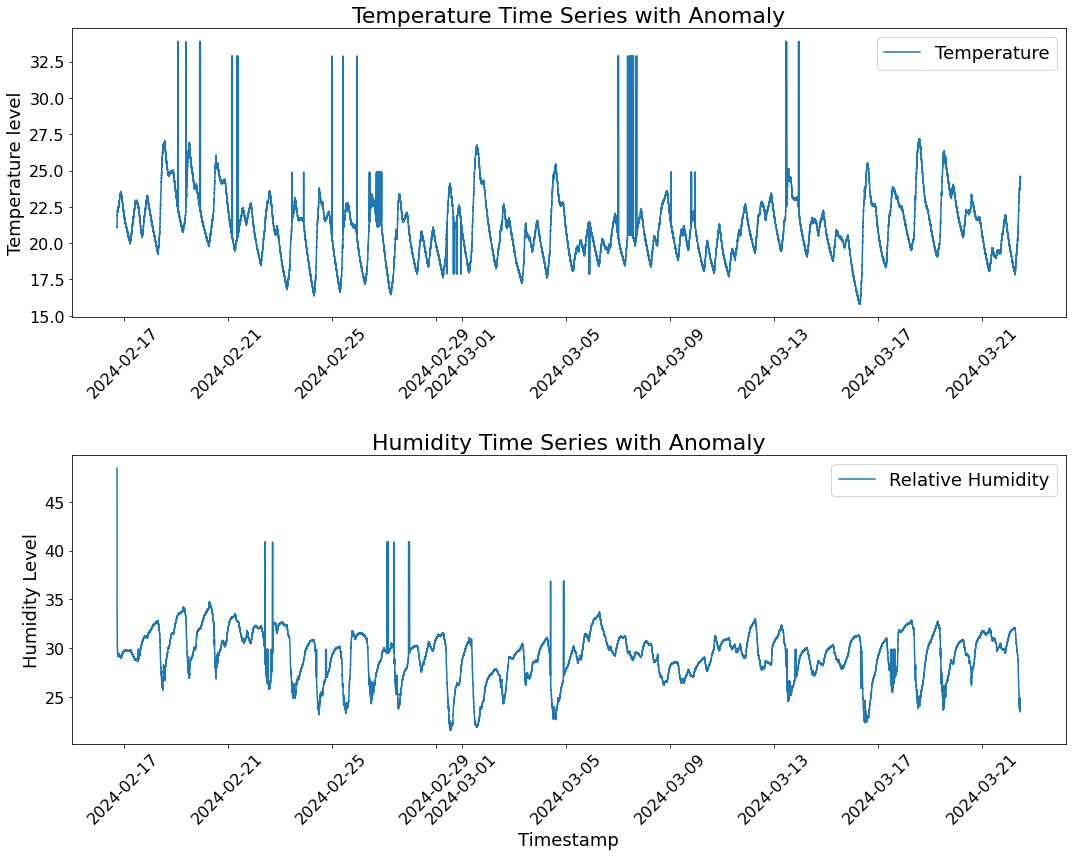

In [161]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Define font sizes for title, labels, and ticks
title_fontsize = 22
label_fontsize = 18
tick_fontsize = 16

# Plot Temp anomaly on the first subplot
axs[0].plot(new_df['time'], new_df['Temp_anomaly'], label='Temperature')
axs[0].set_xlabel(' ', fontsize=label_fontsize)  # Empty label but with bigger font size for consistency
axs[0].set_ylabel('Temperature level', fontsize=label_fontsize)
axs[0].set_title('Temperature Time Series with Anomaly', fontsize=title_fontsize)
axs[0].legend(fontsize=label_fontsize)
axs[0].tick_params(axis='x', labelsize=tick_fontsize, rotation=45)  # Rotate x-axis labels for better readability
axs[0].tick_params(axis='y', labelsize=tick_fontsize)

# Plot RH anomaly on the second subplot
axs[1].plot(new_df['time'], new_df['RH_anomaly'], label='Relative Humidity')
axs[1].set_xlabel('Timestamp', fontsize=label_fontsize)
axs[1].set_ylabel('Humidity Level', fontsize=label_fontsize)
axs[1].set_title('Humidity Time Series with Anomaly', fontsize=title_fontsize)
axs[1].legend(fontsize=label_fontsize)
axs[1].tick_params(axis='x', labelsize=tick_fontsize, rotation=45)
axs[1].tick_params(axis='y', labelsize=tick_fontsize)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [162]:
clean_df = new_df
clean_df.head(20)

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time,RH_anomaly,Temp_anomaly_labels,RH_anomaly_labels
0,2024-02-16 17:44:30,21.12,48.45,21.12,2024-02-16 17:44:30,48.45,0,0
1,2024-02-16 17:44:35,21.25,46.91,21.25,2024-02-16 17:44:35,46.91,0,0
2,2024-02-16 17:44:40,21.25,45.93,21.25,2024-02-16 17:44:40,45.93,0,0
3,2024-02-16 17:44:45,21.25,45.56,21.25,2024-02-16 17:44:45,45.56,0,0
4,2024-02-16 17:44:50,21.25,45.18,21.25,2024-02-16 17:44:50,45.18,0,0
5,2024-02-16 17:44:55,21.19,44.70,21.19,2024-02-16 17:44:55,44.70,0,0
6,2024-02-16 17:45:00,21.19,44.27,21.19,2024-02-16 17:45:00,44.27,0,0
7,2024-02-16 17:45:05,21.19,44.00,21.19,2024-02-16 17:45:05,44.00,0,0
8,2024-02-16 17:45:10,21.19,43.73,21.19,2024-02-16 17:45:10,43.73,0,0
9,2024-02-16 17:45:15,21.19,43.54,21.19,2024-02-16 17:45:15,43.54,0,0


In [75]:
!pip install scalecast
!pip install pandas_datareader

ERROR: Exception:
Traceback (most recent call last):
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_internal/commands/install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_internal/metadata/pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_vendor/packaging/version.py", line 56, in parse
    return Version(version)
  File "/home/

ERROR: Exception:
Traceback (most recent call last):
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/base_command.py", line 105, in _run_wrapper
    status = _inner_run()
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/base_command.py", line 96, in _inner_run
    return self.run(options, args)
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_internal/commands/install.py", line 483, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_internal/metadata/pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "/home/sean/anaconda3/lib/python3.8/site-packages/pip/_vendor/packaging/version.py", line 56, in parse
    return Version(version)
  File "/home/

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox


# Decompose to check temeprature components
decomposition1 = seasonal_decompose(clean_df['Temp_anomaly'], model='additive', period=2300)
clean_df['Temp_Trend'] = decomposition1.trend
clean_df['Temp_Seasonality'] = decomposition1.seasonal
clean_df['Temp_Residual'] = decomposition1.resid

# Stationary temperature Series after removing trend and seasonality
clean_df['Temp_Stationary'] = clean_df['Temp_anomaly'] - (clean_df['Temp_Trend'] - clean_df['Temp_Seasonality'])
clean_df = clean_df.drop(columns=['Temp_Trend','Temp_Seasonality','Temp_Residual'], axis=1)

# Decompose to check humidity components
decomposition2 = seasonal_decompose(clean_df['RH_anomaly'], model='additive', period=2300)
clean_df['RH_Trend'] = decomposition2.trend
clean_df['RH_Seasonality'] = decomposition2.seasonal
clean_df['RH_Residual'] = decomposition2.resid

# Stationary humidity Series after removing trend and seasonality
clean_df['RH_Stationary'] = clean_df['RH_anomaly'] - clean_df['RH_Trend'] - clean_df['RH_Seasonality']
clean_df = clean_df.drop(columns=['RH_Trend','RH_Seasonality','RH_Residual'], axis=1)

In [164]:
new_df['RH_anomaly_labels'].value_counts()

RH_anomaly_labels
0    595197
1      4803
Name: count, dtype: int64

In [165]:
new_df['Temp_anomaly_labels'].value_counts()

Temp_anomaly_labels
0    593498
1      6502
Name: count, dtype: int64

In [166]:
clean_df = clean_df.dropna(subset=['Temp_Stationary'])
clean_df = clean_df.dropna(subset=['RH_Stationary'])

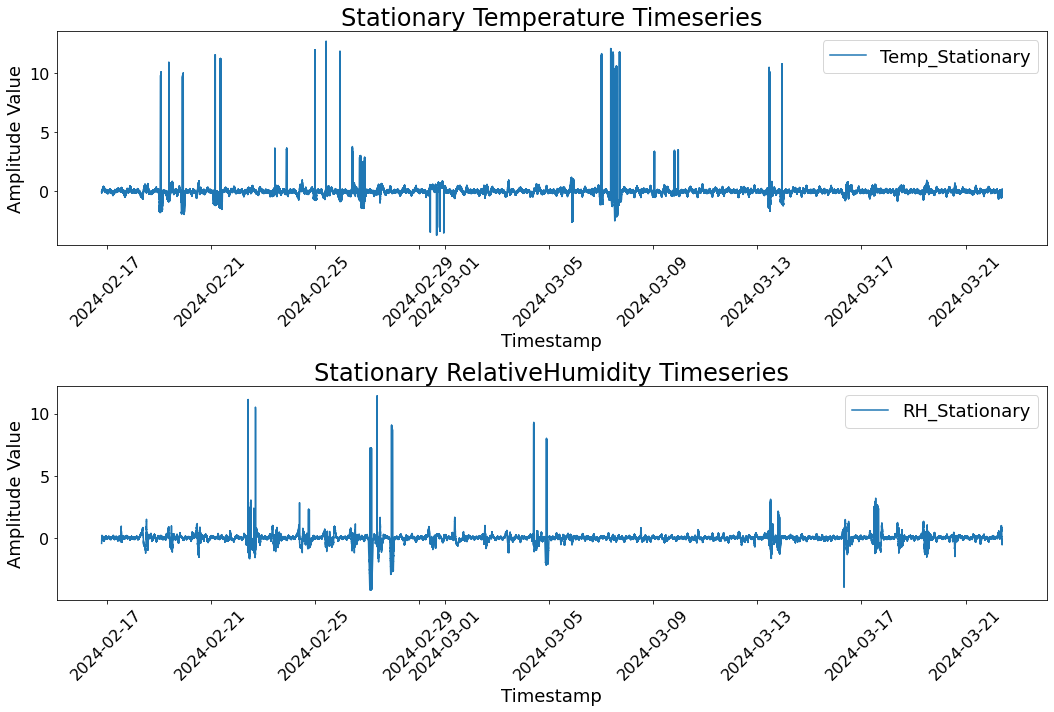

In [167]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (one row, two columns)
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Define font sizes for title, labels, and ticks
title_fontsize = 24
label_fontsize = 18
tick_fontsize = 16

# Plot Temp on the first subplot
axs[0].plot(clean_df['time'], clean_df['Temp_Stationary'], label='Temp_Stationary')
axs[0].set_xlabel('Timestamp', fontsize=label_fontsize)
axs[0].set_ylabel('Amplitude Value', fontsize=label_fontsize)
axs[0].set_title('Stationary Temperature Timeseries', fontsize=title_fontsize)
axs[0].legend(fontsize=label_fontsize)
axs[0].tick_params(axis='x', labelsize=tick_fontsize, rotation=45)  # Rotate x-axis labels for better readability
axs[0].tick_params(axis='y', labelsize=tick_fontsize)

# Plot RelativeHumidity on the second subplot
axs[1].plot(clean_df['time'], clean_df['RH_Stationary'], label='RH_Stationary')
axs[1].set_xlabel('Timestamp', fontsize=label_fontsize)
axs[1].set_ylabel('Amplitude Value', fontsize=label_fontsize)
axs[1].set_title('Stationary RelativeHumidity Timeseries', fontsize=title_fontsize)
axs[1].legend(fontsize=label_fontsize)
axs[1].tick_params(axis='x', labelsize=tick_fontsize, rotation=45)  # Rotate x-axis labels for better readability
axs[1].tick_params(axis='y', labelsize=tick_fontsize)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

# TEST FOR STATIONARITY OF TEMPERATURE DATA

In [168]:
X = abs(clean_df['Temp_Stationary'].values)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.274440, mean2=0.236448
variance1=0.680129, variance2=0.619927


# TEST FOR STATIONARITY OF TEMPERATURE DATA

In [169]:
X = abs(clean_df['RH_Stationary'].values)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.304983, mean2=0.159661
variance1=0.682180, variance2=0.061617


In [35]:
from statsmodels.tsa.stattools import adfuller

clean_df = clean_df.dropna(subset=['Temp_Stationary'])
clean_df = clean_df.dropna(subset=['RH_Stationary'])

adf_result1 = adfuller(abs(clean_df['Temp_Stationary']))
adf_result2 = adfuller(abs(clean_df['RH_Stationary']))


# Print the ADF test results
#print(f"ADF Statistic: {adf_result1[0]}")
print(f"p-value: {adf_result1[1]}")

print(f"p-value: {adf_result2[1]}")

p-value: 0.0
p-value: 0.0


# SUBTRACTION TECHNIQUE TO REDUCE TIME SERIES INTO ONE
# SUBTRACTION OF HUMIDITY FROM TEMPERATURE

In [170]:
clean_df['Temp_Stationary'] = abs(clean_df['Temp_Stationary'])
clean_df['RH_Stationary'] = abs(clean_df['RH_Stationary'])

clean_df['Temp_RH_stationary'] = abs(clean_df['Temp_Stationary'] - clean_df['RH_Stationary'])

clean_df['var_Temp_anomaly'] = clean_df['Temp_Stationary'].var(ddof=0)
clean_df['var_RH_anomaly'] = clean_df['RH_Stationary'].var(ddof=0)
clean_df

,time,Temperature,RelativeHumidity,Temp_anomaly,anomaly_time,RH_anomaly,Temp_anomaly_labels,RH_anomaly_labels,Temp_Stationary,RH_Stationary,Temp_RH_stationary,var_Temp_anomaly,var_RH_anomaly
1150,2024-02-16 19:20:21,22.62,29.33,22.62,2024-02-16 19:20:21,29.33,0,0,0.031755,0.440788,0.409033,0.650389,0.377178
1151,2024-02-16 19:20:26,22.56,29.34,22.56,2024-02-16 19:20:26,29.34,0,0,0.086534,0.423971,0.337437,0.650389,0.377178
1152,2024-02-16 19:20:31,22.62,29.34,22.62,2024-02-16 19:20:31,29.34,0,0,0.031391,0.428796,0.397405,0.650389,0.377178
1153,2024-02-16 19:20:36,22.56,29.35,22.56,2024-02-16 19:20:36,29.35,0,0,0.095555,0.411125,0.315569,0.650389,0.377178
1154,2024-02-16 19:20:41,22.62,29.35,22.62,2024-02-16 19:20:41,29.35,0,0,0.033130,0.404073,0.370944,0.650389,0.377178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598845,2024-03-22 09:49:52,22.38,26.14,22.38,2024-03-22 09:49:52,26.14,0,0,0.174017,0.510440,0.336423,0.650389,0.377178
598846,2024-03-22 09:49:57,22.38,26.14,22.38,2024-03-22 09:49:57,26.14,0,0,0.189095,0.507042,0.317946,0.650389,0.377178
598847,2024-03-22 09:50:02,22.38,26.12,22.38,2024-03-22 09:50:02,26.12,0,0,0.172918,0.524795,0.351878,0.650389,0.377178
598848,2024-03-22 09:50:07,22.38,26.12,22.38,2024-03-22 09:50:07,26.12,0,0,0.174057,0.522435,0.348379,0.650389,0.377178


# MANUAL LABELLING OF Z FEATURE CALLED ''Temp_RH_Anomaly_Labels''

In [171]:
clean_df['Temp_RH_Anomaly_Labels'] = clean_df.apply(lambda row: 0 if (row['Temp_anomaly_labels'] == 0 and row['RH_anomaly_labels'] == 0) else 1, axis=1)

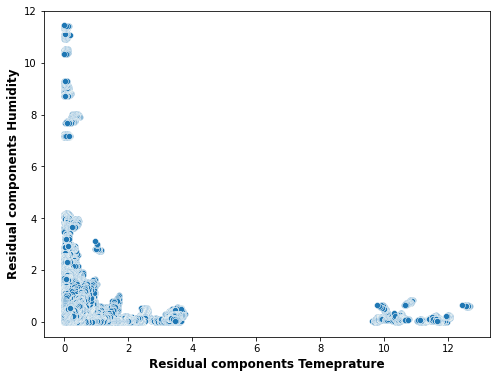

In [198]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=clean_df, x='Temp_Stationary', y='RH_Stationary')
plt.title('', weight='bold', fontsize=15)
plt.ylabel('Residual components Humidity', weight='bold', fontsize=12)
plt.xlabel('Residual components Temeprature', weight='bold', fontsize=12)
plt.show()

# MODEL BUILDING, TESTING, EVALUATION   USING ONECLASS SVM

In [173]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

labelled_data = clean_df[['time', 'Temp_RH_Anomaly_Labels', 'Temp_RH_stationary']]

In [174]:
labelled_data

,time,Temp_RH_Anomaly_Labels,Temp_RH_stationary
1150,2024-02-16 19:20:21,0,0.409033
1151,2024-02-16 19:20:26,0,0.337437
1152,2024-02-16 19:20:31,0,0.397405
1153,2024-02-16 19:20:36,0,0.315569
1154,2024-02-16 19:20:41,0,0.370944
...,...,...,...
598845,2024-03-22 09:49:52,0,0.336423
598846,2024-03-22 09:49:57,0,0.317946
598847,2024-03-22 09:50:02,0,0.351878
598848,2024-03-22 09:50:07,0,0.348379


# NORMALIZATION

In [175]:
val_min = labelled_data['Temp_RH_stationary'].min()
val_max = labelled_data['Temp_RH_stationary'].max()

# Feature scaling
labelled_data['Temp_RH_diff_scaled'] = labelled_data['Temp_RH_stationary'].apply(lambda x: (x - val_min) / (val_max - val_min))

<ipython-input-175-181fca226024>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled_data['Temp_RH_diff_scaled'] = labelled_data['Temp_RH_stationary'].apply(lambda x: (x - val_min) / (val_max - val_min))


In [176]:
labelled_data

,time,Temp_RH_Anomaly_Labels,Temp_RH_stationary,Temp_RH_diff_scaled
1150,2024-02-16 19:20:21,0,0.409033,0.033824
1151,2024-02-16 19:20:26,0,0.337437,0.027904
1152,2024-02-16 19:20:31,0,0.397405,0.032863
1153,2024-02-16 19:20:36,0,0.315569,0.026095
1154,2024-02-16 19:20:41,0,0.370944,0.030674
...,...,...,...,...
598845,2024-03-22 09:49:52,0,0.336423,0.027820
598846,2024-03-22 09:49:57,0,0.317946,0.026292
598847,2024-03-22 09:50:02,0,0.351878,0.029098
598848,2024-03-22 09:50:07,0,0.348379,0.028808


# TRAIN TEST SPLIT 

In [179]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle  # To shuffle the data


normal_group = labelled_data[labelled_data['Temp_RH_Anomaly_Labels'] != 1]  # Normal data
anomaly_group = labelled_data[labelled_data['Temp_RH_Anomaly_Labels'] == 1]  # Anomalous data

normal_group = normal_group[['Temp_RH_diff_scaled']]
anomaly_group = anomaly_group[['Temp_RH_diff_scaled']]  # Anomalous data

# Shuffle the data to randomize the order of the samples
normal_group = shuffle(normal_group).reset_index(drop=True)
anomaly_group = shuffle(anomaly_group).reset_index(drop=True)

# Determine split indices for normal group
split_index = int(len(normal_group) * 0.70)  # 60% for training, 40% for validation

# Split normal data for training/validation
X_train_normal = normal_group[:split_index]
X_val_normal = normal_group[split_index:]

X_val = pd.concat([X_val_normal, anomaly_group])

# Shuffle the concatenated data to randomize the samples
#X_val = X_val.sample(frac=1, random_state=42).reset_index(drop=True)

# Further split the validation data into validation and unseen test data (64.5% for validation)
#split_index_val = int(len(X_val) * 0.645)
#X_val, X_val_test_unseen = X_val[:split_index_val], X_val[split_index_val:]

# Testing and anomaly detection
#X_val_scaled_anomaly = np.array(anomaly_group)

# Convert Pandas Series to NumPy array
X_train_normal = X_train_normal.to_numpy()
X_val = X_val.to_numpy()

# Reshape the array
#X_train_normal = X_train_normal.reshape(-1, 1)
#X_val = X_val.reshape(-1, 1)
len(X_val)

187224

# MODEL FIT, TRAIN AND HYPER PARAMETER TUNING

In [180]:
# Model Training
clf = OneClassSVM(nu=0.016, kernel="rbf", gamma=0.02)  # Adjust hyperparameters if needed
clf.fit(X_train_normal)

OneClassSVM(gamma=0.02, nu=0.016)

# MODEL TESTING

In [181]:
import time

# Start the timer
start_time = time.time()

# Predictions
y_pred_val = clf.predict(X_val)  # Predictions: 1 for inliers, -1 for outliers

# Model Evaluation
y_val_true = [0] * len(X_val_normal) + [1] * len(anomaly_group)  # True labels: 1 for normal, -1 for anomaly

# End the timer
end_time = time.time()

# Calculate the time taken
execution_time = end_time - start_time
print(f"Time taken to run the validation data: {execution_time} seconds")

Time taken to run the validation data: 45.417394161224365 seconds


In [182]:
y_pred_val = np.where(y_pred_val == -1, 1, 0)

# TESTING RESULTS

In [183]:
precision = precision_score(y_val_true, y_pred_val, pos_label=1)
recall = recall_score(y_val_true, y_pred_val, pos_label=1)
f1 = f1_score(y_val_true, y_pred_val, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.7727097321910936
Recall: 0.8856258292790801
F1-Score: 0.82532355123238


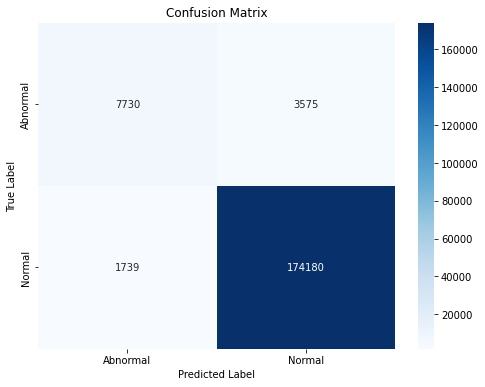

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_val_true, y_pred_val)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Abnormal', 'Normal'], yticklabels=['Abnormal', 'Normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



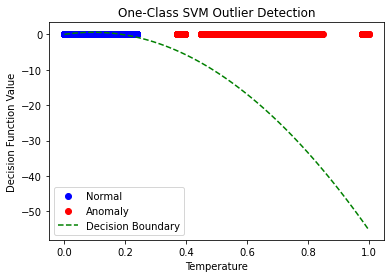

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of normal instances
plt.scatter(X_val_normal, np.zeros_like(X_val_normal), label='Normal', color='blue')

# Scatter plot of anomaly instances
plt.scatter(anomaly_group, np.zeros_like(anomaly_group), label='Anomaly', color='red')

# Decision boundary plot
xx = np.linspace(np.min(X_val), np.max(X_val), 100)
yy = clf.decision_function(xx.reshape(-1, 1))
plt.plot(xx, yy, label='Decision Boundary', linestyle='--', color='green')

plt.xlabel('Temperature')
plt.ylabel('Decision Function Value')
plt.title('One-Class SVM Outlier Detection')
plt.legend()
plt.show()
